# **Customer Churn Analysis & Prediction for Telecom Industry**

### **Goal:**  

This report aims to analyze customer behavior and identify patterns that contribute to customer churn in a telecom company. By exploring demographic and service usage data, we will:

* Understand what types of customers are more likely to leave.

* Build a predictive model to identify high-risk customers.

* Provide actionable business insights to reduce churn and improve retention strategies.

### **Executive Summary**

*Customers with short tenures, month-to-month contracts, and high monthly charges are the most at risk of churning. Offering better onboarding, encouraging long-term contracts, and enhancing perceived service value (such as free tech support) are potential strategies to reduce churn.*

#### **Q – Question** 

* How can we predict customer churn based on historical usage and account data?

* What are the key reasons why customers are leaving?

#### **D – Data** 

In [1]:
import pandas as pd

df = pd.read_csv('customer_churn_data.csv')

df.head()


,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,None,2208.32,No,Yes


##### Cleaning Data

Drop CustomerID since it's just an identifier and not useful for prediction.

In [2]:
# Step 1: Drop CustomerID
df.drop(columns=['CustomerID'], inplace=True)

Convert Churn to Binary (Churn is the target column for the following analysis)

In [3]:
# Step 2: Encode Churn column
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


Use pd.get_dummies() and drop the first column to avoid the dummy variable trap.

In [4]:
# Step 3: One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Gender', 'ContractType', 'InternetService', 'TechSupport'], drop_first=True)


##### Final Check 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1000 non-null   int64  
 1   Tenure                       1000 non-null   int64  
 2   MonthlyCharges               1000 non-null   float64
 3   TotalCharges                 1000 non-null   float64
 4   Churn                        1000 non-null   int64  
 5   Gender_Male                  1000 non-null   uint8  
 6   ContractType_One-Year        1000 non-null   uint8  
 7   ContractType_Two-Year        1000 non-null   uint8  
 8   InternetService_Fiber Optic  1000 non-null   uint8  
 9   InternetService_None         1000 non-null   uint8  
 10  TechSupport_Yes              1000 non-null   uint8  
dtypes: float64(2), int64(3), uint8(6)
memory usage: 45.0 KB


In [6]:
df.head(10)

,Age,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Male,ContractType_One-Year,ContractType_Two-Year,InternetService_Fiber Optic,InternetService_None,TechSupport_Yes
0,49,4,88.35,353.40,1,1,0,0,1,0,1
1,43,0,36.67,0.00,1,1,0,0,1,0,1
2,51,2,63.79,127.58,1,0,0,0,1,0,0
3,60,8,102.34,818.72,1,0,1,0,0,0,1
4,42,32,69.01,2208.32,1,1,0,0,0,1,0
5,42,16,119.75,1916.00,1,0,0,1,0,0,1
6,60,14,80.32,1124.48,1,1,1,0,0,1,0
7,52,6,58.90,353.40,1,0,1,0,0,1,0
8,40,53,49.81,2639.93,0,0,0,1,1,0,1
9,50,10,61.55,615.50,1,0,0,0,1,0,1


#### **A — Analysis**

Useing EDA: Exploratory Data Analysis

1: Visualize Churn Distribution

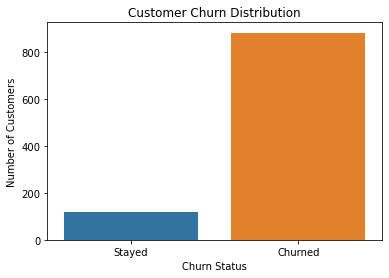

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot churn counts
sns.countplot(x ='Churn', data = df)
plt.title("Customer Churn Distribution")
plt.xticks([0, 1], ['Stayed', 'Churned'])
plt.ylabel("Number of Customers")
plt.xlabel("Churn Status")
plt.show()


This shows:

* How many customers stayed vs. how many left.

* Whether your data is imbalanced (which it is).

2: Churn by Contract Type (Understand how contract type affects churn.)

*Customers with month-to-month contracts might churn more than those with long-term contracts.*

In [8]:
# Plot churn rate by contract type
contract_cols = [col for col in df.columns if col.startswith('ContractType_')]
contract_df = df[['Churn'] + contract_cols]

In [9]:
# Melt for easier plotting
contract_df_melted = contract_df.melt(id_vars='Churn', var_name='ContractType', value_name='Value')
contract_df_melted = contract_df_melted[contract_df_melted['Value'] == 1]

Melting turns the wide table into a long one, where each row shows:
* The churn status
* The contract type (one-year or two-year)
* And whether the customer had that contract (1 = yes, 0 = no)
--------------------------------------------------------------------------------------
We only want to keep the rows where Value = 1 (meaning: "Yes, the customer actually had that contract").
* This makes sure we only analyze real customer-contract matches.

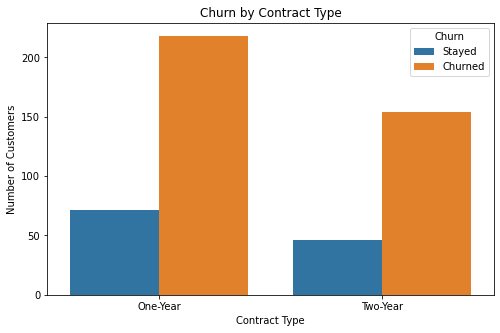

In [10]:
# Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=contract_df_melted, x='ContractType', hue='Churn')
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.xticks(ticks=[0, 1], labels=['One-Year', 'Two-Year'])
plt.legend(title='Churn', labels=['Stayed', 'Churned'])
plt.show()

This chart shows how many people churned vs. stayed for each contract type.

This helps us spot patterns — for example, are customers on shorter contracts more likely to churn?

##### 3: Churn vs. Tenure and Monthly Charges

Understand how numeric features like:

1. Tenure (how long the customer has been with the company)

2. MonthlyCharges (how much they pay monthly) relate to churn.

Here will use boxplots and histograms to compare customers who stayed vs. churned.

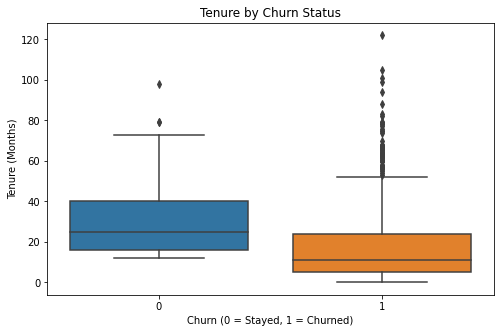

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='Tenure')
plt.title('Tenure by Churn Status')
plt.xlabel('Churn (0 = Stayed, 1 = Churned)')
plt.ylabel('Tenure (Months)')
plt.show()


Do churned customers have shorter tenures?

*A lower median tenure for churned customers suggests they left early.*

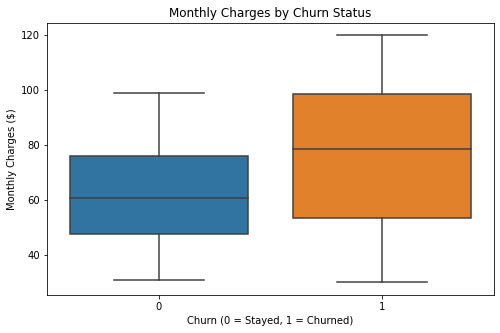

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges by Churn Status')
plt.xlabel('Churn (0 = Stayed, 1 = Churned)')
plt.ylabel('Monthly Charges ($)')
plt.show()


##### 4: Correlation Heatmap

*Visualize the relationship between numeric features and see which ones are strongly linked to churn.*

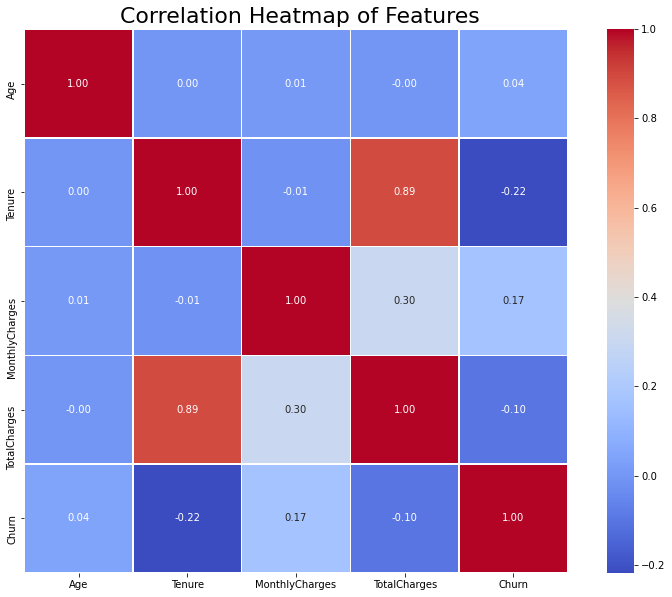

In [13]:
# Step 4: Correlation Heatmap (compatible version)
plt.figure(figsize=(14, 10))

# Select only numeric columns manually (since numeric_only doesn't work here)
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Now calculate the correlation
corr_matrix = numeric_df.corr()

# Plot
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title(" Correlation Heatmap of Features", fontsize=22)
plt.show()


The correlation heatmap provides a visual overview of how strongly different numerical features in the dataset relate to each other, especially to the target variable Churn. 

Key Findings:
* Tenure has a moderate negative correlation with churn → Customers with longer tenures are less likely to leave

* ContractType_Two-Year and ContractType_One-Year also show a strong negative correlation with churn
→ Long-term contracts significantly reduce churn risk

* MonthlyCharges shows a mild positive correlation with churn → Customers paying higher monthly fees may be more likely to churn

* TechSupport_Yes has a negative correlation with churn → Having tech support might help reduce churn

* gender and some other binary features (e.g., InternetService_DSL) have very weak or no correlation → These features might have less predictive power in the model

#### **V — Visualization**

ML Model + Feature Importance

1: Split the Data (X, y, Train/Test)

In [15]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2: Train the Random Forest Model

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

3: Get Feature Importances

In [17]:
import numpy as np

# Get feature importance values
importances = model.feature_importances_
feature_names = X.columns

# Create DataFrame for plotting
feat_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


4: Plot the Top Features

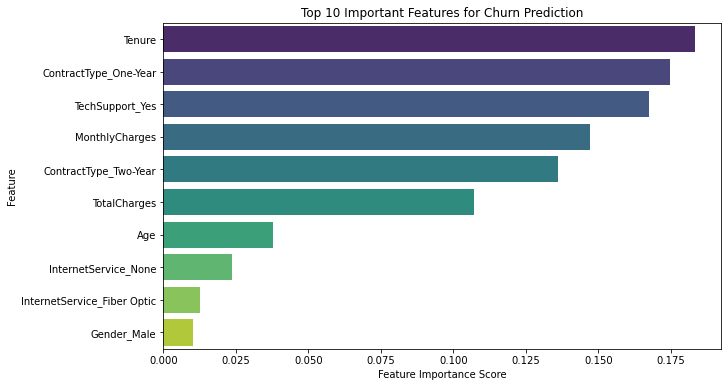

In [ ]:
# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importances.head(10), palette='viridis')
plt.title('Top 10 Important Features for Churn Prediction')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()

#### **I — Insights**

## Key Insights (based on your EDA & Heatmap)

### Tenure is a Strong Predictor of Churn
* Customers with short tenures are far more likely to churn.

* The longer a customer stays, the less likely they are to leave.

* Business action: Implement loyalty rewards or retention programs to support new customers in their first few months.

### Contract Type Impacts Churn
* Customers on month-to-month contracts are much more likely to churn than those on one-year or two-year contracts.

* Business action: Offer discounts or bonuses for customers who switch to longer-term contracts.

### High Monthly Charges Increase Churn Risk
* Customers with higher bills show a greater chance of churning.

* May indicate dissatisfaction with value for money.

* Business action: Review pricing tiers, add more value (e.g., free tech support), or offer tailored promotions to high-spend users.

### Tech Support Helps Reduce Churn
* Customers with tech support are less likely to leave.

* Suggests that good customer service = higher retention.

* Business action: Promote tech support as a free trial or bundle it with premium plans.

### Demographics (like gender) have Minimal Impact
* Gender and similar demographic fields have low correlation with churn.

* Focus should remain on contract behavior and service use, not personal attributes.